In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import config
import sys
sys.path.append(os.path.join(os.getcwd(), 'Aging_Model'))
import FigureConfig as FC

# Dataset

In [2]:
if config.current_dataset is not None:
    ds = config.datasets[config.current_dataset]
else:
    ds = config.datasets[0]

ds

'VertebralColumn_c2'

In [3]:
path = os.path.join(os.getcwd(), 'result', 'figures')
rawfiles = [f for f in os.listdir(path) if f.endswith('.txt') if f.startswith(ds)]
rawfiles.sort()
files = [f.replace(ds, '') for f in rawfiles]
rawfiles

['VertebralColumn_c2_AAPNN_ACC_0_648.txt',
 'VertebralColumn_c2_AAPNN_ACC_1_657.txt',
 'VertebralColumn_c2_AAPNN_ACC_2_695.txt',
 'VertebralColumn_c2_AAPNN_ACC_3_721.txt',
 'VertebralColumn_c2_AAPNN_ACC_4_721.txt',
 'VertebralColumn_c2_AAPNN_MAA_0_538.txt',
 'VertebralColumn_c2_AAPNN_MAA_1_555.txt',
 'VertebralColumn_c2_AAPNN_MAA_2_606.txt',
 'VertebralColumn_c2_AAPNN_MAA_3_612.txt',
 'VertebralColumn_c2_AAPNN_MAA_4_633.txt',
 'VertebralColumn_c2_PNN_ACC_0_632.txt',
 'VertebralColumn_c2_PNN_ACC_1_613.txt',
 'VertebralColumn_c2_PNN_ACC_2_660.txt',
 'VertebralColumn_c2_PNN_ACC_3_691.txt',
 'VertebralColumn_c2_PNN_ACC_4_642.txt',
 'VertebralColumn_c2_PNN_ACC_5_617.txt',
 'VertebralColumn_c2_PNN_ACC_6_606.txt',
 'VertebralColumn_c2_PNN_ACC_7_663.txt',
 'VertebralColumn_c2_PNN_ACC_8_689.txt',
 'VertebralColumn_c2_PNN_ACC_9_648.txt',
 'VertebralColumn_c2_PNN_MAA_0_467.txt',
 'VertebralColumn_c2_PNN_MAA_1_549.txt',
 'VertebralColumn_c2_PNN_MAA_2_596.txt',
 'VertebralColumn_c2_PNN_MAA_3_590.tx

In [4]:
PNN_accs = [int(f[11:-4]) for f in files if f[1:8]=='PNN_ACC']
PNN_maas = [int(f[11:-4]) for f in files if f[1:8]=='PNN_MAA']
AAPNN_accs = [int(f[13:-4]) for f in files if f[1:10]=='AAPNN_ACC']
AAPNN_maas = [int(f[13:-4]) for f in files if f[1:10]=='AAPNN_MAA']

In [5]:
best_PNN_ACC_name_start = ds + '_' + 'PNN_ACC_'
best_PNN_ACC_name_end = '_' + str(max(PNN_accs)) + '.txt'
best_PNN_ACC_name = [f for f in rawfiles if f.startswith(best_PNN_ACC_name_start) if f.endswith(best_PNN_ACC_name_end)][0]
best_PNN_ACC_name

'VertebralColumn_c2_PNN_ACC_3_691.txt'

In [6]:
best_PNN_MAA_name_start = ds + '_' + 'PNN_MAA_'
best_PNN_MAA_name_end = '_' + str(max(PNN_maas)) + '.txt'
best_PNN_MAA_name = [f for f in rawfiles if f.startswith(best_PNN_MAA_name_start) if f.endswith(best_PNN_MAA_name_end)][0]
best_PNN_MAA_name

'VertebralColumn_c2_PNN_MAA_2_596.txt'

In [7]:
best_AAPNN_ACC_name_start = ds + '_' + 'AAPNN_ACC_'
best_AAPNN_ACC_name_end = '_' + str(max(AAPNN_accs)) + '.txt'
best_AAPNN_ACC_name = [f for f in rawfiles if f.startswith(best_AAPNN_ACC_name_start) if f.endswith(best_AAPNN_ACC_name_end)][0]
best_AAPNN_ACC_name

'VertebralColumn_c2_AAPNN_ACC_3_721.txt'

In [8]:
best_AAPNN_MAA_name_start = ds + '_' + 'AAPNN_MAA_'
best_AAPNN_MAA_name_end = '_' + str(max(AAPNN_maas)) + '.txt'
best_AAPNN_MAA_name = [f for f in rawfiles if f.startswith(best_AAPNN_MAA_name_start) if f.endswith(best_AAPNN_MAA_name_end)][0]
best_AAPNN_MAA_name

'VertebralColumn_c2_AAPNN_MAA_4_633.txt'

In [9]:
PNN_ACC = np.loadtxt(os.path.join(path, best_PNN_ACC_name))
PNN_MAA = np.loadtxt(os.path.join(path, best_PNN_MAA_name))
AAPNN_ACC = np.loadtxt(os.path.join(path, best_AAPNN_ACC_name))
AAPNN_MAA = np.loadtxt(os.path.join(path, best_AAPNN_MAA_name))

In [10]:
mean_acc_PNN = PNN_ACC[0]
std_acc_PNN = PNN_ACC[1]
mean_maa_PNN = PNN_MAA[0]
std_maa_PNN = PNN_MAA[1]
mean_acc_AAPNN = AAPNN_ACC[0]
std_acc_AAPNN = AAPNN_ACC[1]
mean_maa_AAPNN = AAPNN_MAA[0]
std_maa_AAPNN = AAPNN_MAA[1]

In [11]:
mean_mean_acc_PNN   = np.mean(mean_acc_PNN)
mean_std_acc_PNN    = np.mean(std_acc_PNN)
mean_mean_maa_PNN   = np.mean(mean_maa_PNN)
mean_std_maa_PNN    = np.mean(std_maa_PNN)
mean_mean_acc_AAPNN = np.mean(mean_acc_AAPNN)
mean_std_acc_AAPNN  = np.mean(std_acc_AAPNN)
mean_mean_maa_AAPNN = np.mean(mean_maa_AAPNN)
mean_std_maa_AAPNN  = np.mean(std_maa_AAPNN)

report = np.array([mean_mean_acc_PNN,   mean_std_acc_PNN,   mean_mean_maa_PNN,   mean_std_maa_PNN,
                   mean_mean_acc_AAPNN, mean_std_acc_AAPNN, mean_mean_maa_AAPNN, mean_std_maa_AAPNN])
np.savetxt(f'./result/figures/{ds}_report.txt', report, fmt='%.3f')

# Visualization

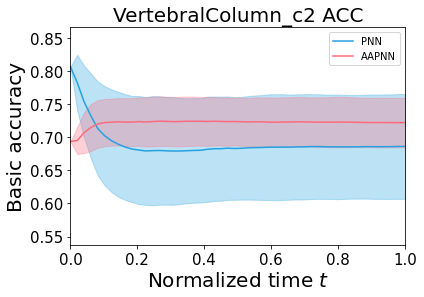

In [12]:
plt.fill_between(np.linspace(0,1,50), mean_acc_PNN-std_acc_PNN, mean_acc_PNN+std_acc_PNN, alpha=0.3, color=FC.Cyan);
plt.fill_between(np.linspace(0,1,50), mean_acc_AAPNN-std_acc_AAPNN, mean_acc_AAPNN+std_acc_AAPNN, alpha=0.3, color=FC.Pink);

plt.plot(np.linspace(0,1,50), mean_acc_PNN, label='PNN', color=FC.Cyan);
plt.plot(np.linspace(0,1,50), mean_acc_AAPNN, label='AAPNN', color=FC.Pink);

plt.title(f'{ds} ACC', fontsize=20)
plt.xlabel('Normalized time $t$', fontsize=20);
plt.ylabel('Basic accuracy', fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([0, 1]);
plt.ylim([max([0, 0.9*min([min(mean_acc_PNN-std_acc_PNN), min(mean_acc_AAPNN-std_acc_AAPNN)])]),
          min([1, 1.05*max([max(mean_acc_PNN+std_acc_PNN), max(mean_acc_AAPNN+std_acc_AAPNN)])])]);

plt.legend();
plt.savefig(f'./result/figures/{ds}_ACC_final.pdf', format='pdf', bbox_inches='tight')

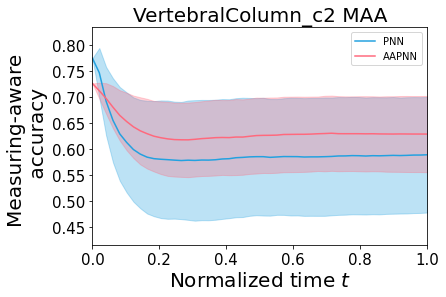

In [13]:
plt.fill_between(np.linspace(0,1,50), mean_maa_PNN-std_maa_PNN, mean_maa_PNN+std_maa_PNN, alpha=0.3, color=FC.Cyan);
plt.fill_between(np.linspace(0,1,50), mean_maa_AAPNN-std_maa_AAPNN, mean_maa_AAPNN+std_maa_AAPNN, alpha=0.3, color=FC.Pink);

plt.plot(np.linspace(0,1,50), mean_maa_PNN, label='PNN', color=FC.Cyan);
plt.plot(np.linspace(0,1,50), mean_maa_AAPNN, label='AAPNN', color=FC.Pink);

plt.title(f'{ds} MAA', fontsize=20)
plt.xlabel('Normalized time $t$', fontsize=20);
plt.ylabel(f'Measuring-aware \n accuracy', fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([0, 1]);
plt.ylim([max([0, 0.9*min([min(mean_maa_PNN-std_maa_PNN), min(mean_maa_AAPNN-std_maa_AAPNN)])]),
          min([1, 1.05*max([max(mean_maa_PNN+std_maa_PNN), max(mean_maa_AAPNN+std_maa_AAPNN)])])]);
plt.legend();
plt.savefig(f'./result/figures/{ds}_MAA_final.pdf', format='pdf', bbox_inches='tight')